In [2]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
crime = pd.read_csv("crime_data.csv")

In [4]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
#Rename the Column Unnamed to City
crime.rename(columns={'Unnamed: 0':'city'},inplace=True)

In [8]:
crime.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [9]:
crime1=crime.iloc[:,1:]
crime1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
# Converting into numpy array
crime1_array = crime1.values
crime1_array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [12]:
from sklearn.preprocessing import scale 

In [13]:
# Normalizing the numerical data 
crime_normal = scale(crime1_array)

In [14]:
crime_normal

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [15]:
pd.DataFrame(crime_normal)

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


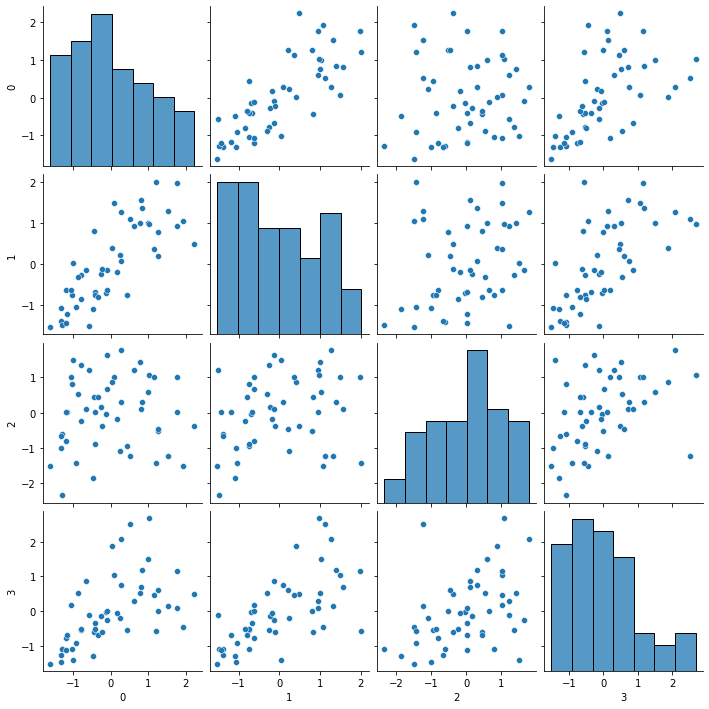

In [16]:
import seaborn as sns
sns.pairplot(pd.DataFrame(crime_normal))

In [ ]:
# Model 1 Hierarchial Clustering with Single Linkage

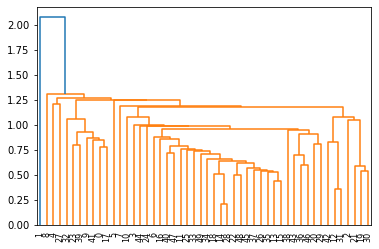

In [17]:
# create dendrogram Single
dendrogram = sch.dendrogram(sch.linkage(crime_normal, method='single'))

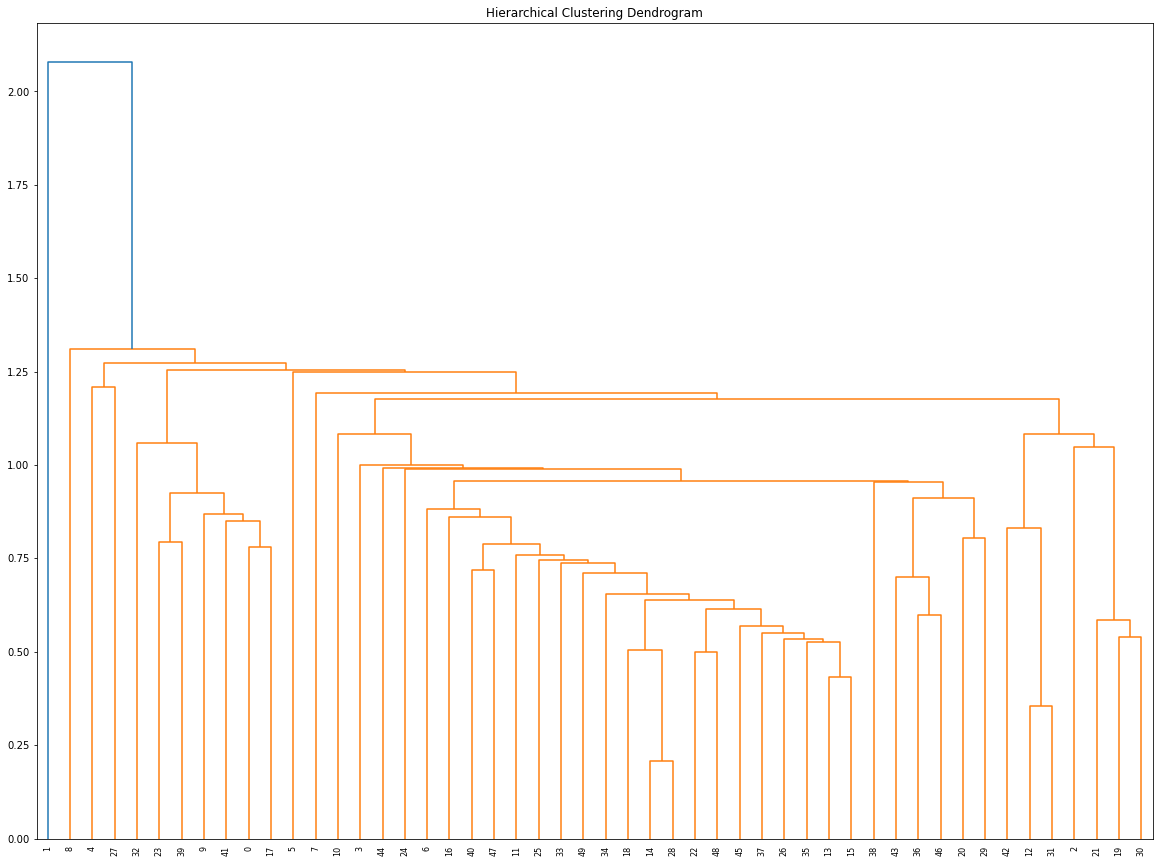

In [22]:
# As the above Dendrogram is very dense changing the figure size
from scipy.cluster.hierarchy import linkage 
z = linkage(crime_normal, method="single",metric="euclidean")
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [23]:
# Number of clusters is 2
# create clusters
hc1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [24]:
# save clusters for chart
y_hc = hc1.fit_predict(crime_normal)
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
clusters=pd.Series(y_hc)
print("Clusters",'',clusters.unique())

Clusters  [0 1]


In [26]:
crime1['Clusters'] =pd.DataFrame(y_hc,columns=['Clusters'])

In [27]:
crime1

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [30]:
result_hier_Single=crime1.groupby(crime1.Clusters).mean()
result_hier_Single=pd.DataFrame(result_hier_Single)
result_hier_Single

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,7.742857,168.877551,65.897959,20.757143
1,10.000000,263.000000,48.000000,44.500000


In [ ]:
#Model 2 Hirerachial Complete Linkage method

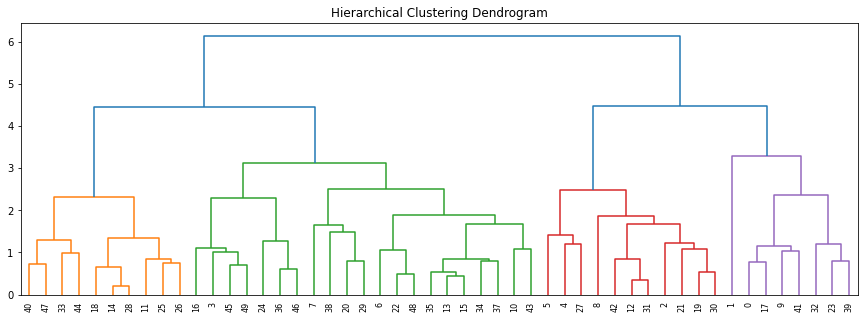

In [19]:
# As the above Dendrogram is very dense changing the figure size
from scipy.cluster.hierarchy import linkage 
z = linkage(crime_normal, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [45]:
# Number of clusters is 4
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [46]:
# save clusters for chart
y_hc = hc1.fit_predict(crime_normal)
y_hc

array([0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 1, 1], dtype=int64)

In [47]:
clusters=pd.Series(y_hc)
print("Clusters",'',clusters.unique())

Clusters  [0 2 1 3]


In [48]:
crime1['Clusters'] =pd.DataFrame(y_hc,columns=['Clusters'])

In [49]:
crime1

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [50]:
result_hier_complete=crime1.groupby(crime1.Clusters).mean()
result_hier_complete=pd.DataFrame(result_hier_complete)
result_hier_complete

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [ ]:
#Model3 Hirerchial with Linkage method = average

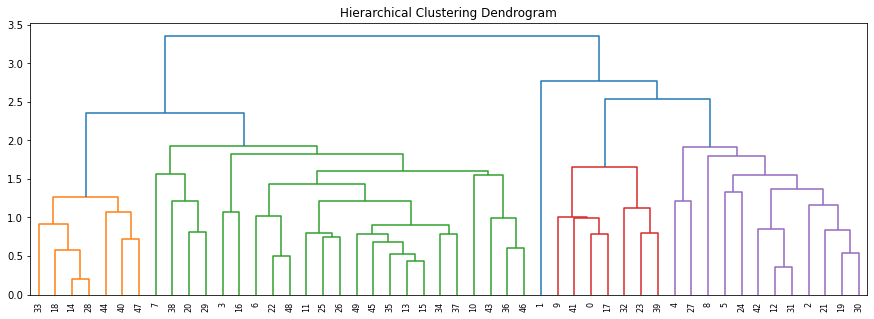

In [37]:
# As the above Dendrogram is very dense changing the figure size
from scipy.cluster.hierarchy import linkage 
z = linkage(crime_normal, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [54]:
# Number of clusters is 4
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [55]:
# save clusters for chart
y_hc = hc1.fit_predict(crime_normal)
y_hc

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [56]:
clusters=pd.Series(y_hc)
print("Clusters",'',clusters.unique())

Clusters  [3 2 1 0]


In [57]:
crime1['Clusters'] =pd.DataFrame(y_hc,columns=['Clusters'])

In [58]:
crime1

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [59]:
result_hier_average=crime1.groupby(crime1.Clusters).mean()
result_hier_average=pd.DataFrame(result_hier_average)
result_hier_average

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,4.870000,114.433333,63.633333,15.943333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714


In [ ]:
#Model 4 Hierarchial Linkage Method = Centroid

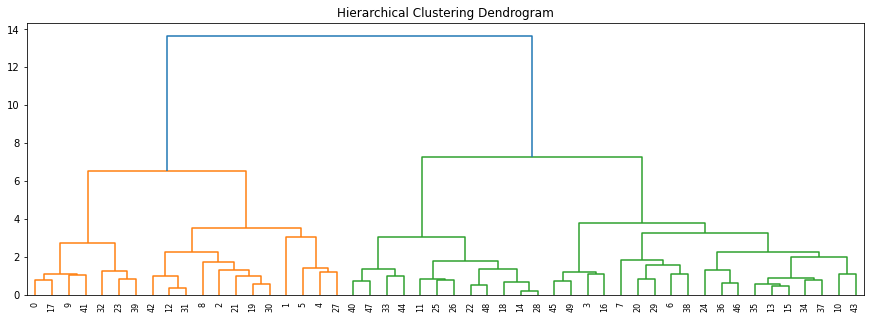

In [64]:
# As the above Dendrogram is very dense changing the figure size
from scipy.cluster.hierarchy import linkage 
z = linkage(crime_normal, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Index')
#plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [65]:
# Number of clusters is 3
# create clusters
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [66]:
# save clusters for chart
y_hc = hc1.fit_predict(crime_normal)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [67]:
clusters=pd.Series(y_hc)
print("Clusters",'',clusters.unique())

Clusters  [0 1 2]


In [68]:
crime1['Clusters'] =pd.DataFrame(y_hc,columns=['Clusters'])

In [69]:
crime1

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [70]:
result_hier_centroid=crime1.groupby(crime1.Clusters).mean()
result_hier_centroid=pd.DataFrame(result_hier_centroid)
result_hier_centroid

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333
